In [2]:
# Importação das bibliotecas necessárias
import pandas as pd  # Para manipulação e análise de dados
import numpy as np   # Para operações matemáticas e arrays
import matplotlib.pyplot as plt  # Para criação de gráficos
from sklearn.linear_model import LinearRegression  # Para regressão linear

In [ ]:
# Esta célula carrega o arquivo CSV contendo os dados dos carros
base = pd.read_csv('carros.csv',encoding= 'latin-1')
base

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


In [ ]:
#Esta célula remove colunas desnecessárias para simplificar a análise
base = base.drop(['Engines','CC/Battery Capacity','Performance(0 - 100 )KM/H','Fuel Types','Seats','Torque'], axis=1)
base.head()

,Company Names,Cars Names,HorsePower,Total Speed,Cars Prices
0,FERRARI,SF90 STRADALE,963 hp,340 km/h,"$1,100,000"
1,ROLLS ROYCE,PHANTOM,563 hp,250 km/h,"$460,000"
2,Ford,KA+,70-85 hp,165 km/h,"$12,000-$15,000"
3,MERCEDES,GT 63 S,630 hp,250 km/h,"$161,000"
4,AUDI,AUDI R8 Gt,602 hp,320 km/h,"$253,290"


In [ ]:
# Esta celula extrai somente os numeros e converte dados textuais em valores numéricos
base['Total Speed'] = base['Total Speed'].str.extract(r'(\d+)').astype(float)
base['HorsePower'] = base['HorsePower'].str.extract(r'(\d+)').astype(float)
base

,Company Names,Cars Names,HorsePower,Total Speed,Cars Prices
0,FERRARI,SF90 STRADALE,963.0,340.0,"$1,100,000"
1,ROLLS ROYCE,PHANTOM,563.0,250.0,"$460,000"
2,Ford,KA+,70.0,165.0,"$12,000-$15,000"
3,MERCEDES,GT 63 S,630.0,250.0,"$161,000"
4,AUDI,AUDI R8 Gt,602.0,320.0,"$253,290"
...,...,...,...,...,...
1213,Toyota,Crown Signia,240.0,180.0,"$43,590  $48,000"
1214,Toyota,4Runner (6th Gen),326.0,180.0,"$50,000"
1215,Toyota,Corolla Cross,169.0,190.0,"$25,210  $29,135"
1216,Toyota,C-HR+,140.0,180.0," 33,000"


In [ ]:
#Esta célula calcula a correlação entre as variáveis utilizadas para treina o modelo
X = base.iloc[:,2].values #HorsePower
y = base.iloc[:,3].values #Total Speed
correlacao = np.corrcoef(X,y)
correlacao #correlação entre as variaveis

array([[1.        , 0.69500542],
       [0.69500542, 1.        ]])

In [ ]:
#Esta célula prepara e treina o modelo de regressão linear
X = X.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [ ]:
#Esta célula mostra o intercepto (b) da equação y = ax + b
modelo.intercept_

165.97149723359672

In [ ]:
#Esta célula mostra o coeficiente angular (a) da equação y = ax + b
modelo.coef_

array([0.16809622])

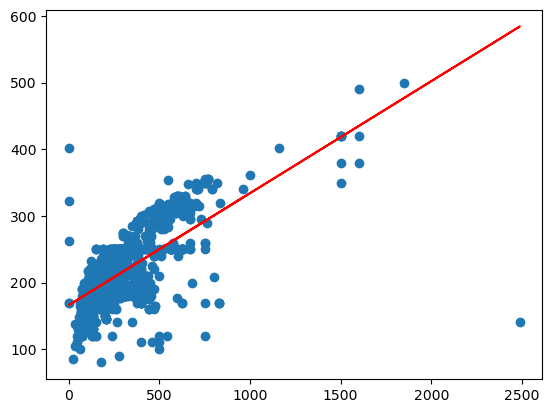

In [ ]:
#Esta célula cria um gráfico visual do modelo
plt.scatter(X,y)
plt.plot(X, modelo.predict(X), color = 'red')


In [ ]:
#Esta célula faz uma predição manual usando a equação do modelo
prev_vel = modelo.coef_*900 + modelo.intercept_
prev_vel

array([317.2580928])

In [ ]:
#Esta célula faz a mesma predição usando o método do modelo
modelo.predict([[900]])

array([317.2580928])